In [26]:
import pandas as pd
import seaborn as sns
df=pd.read_json('gme.json')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5600 entries, 0 to 5599
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5600 non-null   datetime64[ns]
 1   Open       5600 non-null   float64       
 2   High       5600 non-null   float64       
 3   Low        5600 non-null   float64       
 4   Close      5600 non-null   float64       
 5   Adj Close  5600 non-null   float64       
 6   Volume     5600 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 306.4 KB


In [28]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-02-13,2.40625,2.51500,2.38125,2.51250,1.691666,76216000
1,2002-02-14,2.54375,2.54875,2.48125,2.50000,1.683250,11021600
2,2002-02-15,2.50000,2.50625,2.46250,2.48750,1.674834,8389600
3,2002-02-19,2.47500,2.47500,2.34375,2.38750,1.607504,7410400
4,2002-02-20,2.40000,2.46875,2.38125,2.46875,1.662210,6892800


We can see that there are 7 total variables: date, open, high, low, close, adj close, and volume. All of these values are numeric in nature with the date column being in a date time format. 

In [9]:

high=df[df['High']==df['High'].max()]
print(high)

           Date   Open    High      Low      Close  Adj Close     Volume
4772 2021-01-28  66.25  120.75  28.0625  48.400002  48.400002  235263200


In [10]:
df['month']=df['Date'].dt.month

In [11]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,month
0,2002-02-13,2.40625,2.51500,2.38125,2.51250,1.691666,76216000,2
1,2002-02-14,2.54375,2.54875,2.48125,2.50000,1.683250,11021600,2
2,2002-02-15,2.50000,2.50625,2.46250,2.48750,1.674834,8389600,2
3,2002-02-19,2.47500,2.47500,2.34375,2.38750,1.607504,7410400,2
4,2002-02-20,2.40000,2.46875,2.38125,2.46875,1.662210,6892800,2


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5600 entries, 0 to 5599
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5600 non-null   datetime64[ns]
 1   Open       5600 non-null   float64       
 2   High       5600 non-null   float64       
 3   Low        5600 non-null   float64       
 4   Close      5600 non-null   float64       
 5   Adj Close  5600 non-null   float64       
 6   Volume     5600 non-null   int64         
 7   month      5600 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 350.1 KB


In [23]:
monthly_totals = {month: 0 for month in range(1, 13)}
monthly_counts = {month: 0 for month in range(1, 13)}
for i in range(len(df)):
    month = df.loc[i, 'Date'].month
    avg = (df.loc[i, 'High'] + df.loc[i, 'Low']) / 2
    
    monthly_totals[month] += avg
    monthly_counts[month] += 1

monthly_averages = {month: (monthly_totals[month] / monthly_counts[month]) if monthly_counts[month] > 0 else 0 for month in range(1, 13)}

for month in range(1, 13):
    print(f'Month: {month}, Average: {monthly_averages[month]}')

Month: 1, Average: 8.394146076404493
Month: 2, Average: 8.115184758660508
Month: 3, Average: 9.417955668326698
Month: 4, Average: 9.578932123689722
Month: 5, Average: 9.249860214135023
Month: 6, Average: 10.193287575692963
Month: 7, Average: 9.48407867025863
Month: 8, Average: 9.596032276639347
Month: 9, Average: 9.570212510000005
Month: 10, Average: 9.064278152892557
Month: 11, Average: 9.442765287777776
Month: 12, Average: 8.551337557112056


In [30]:
def scatter(df, x, y, outliers):
    idx=[]
    for i in range(outliers):
        idx=df[x].idxmax()
        df.drop([idx], inplace=True)
    sns.scatterplot(data=df, x=x, y=y)

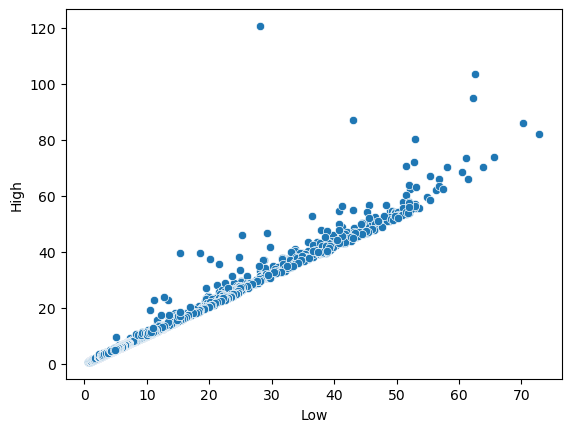

In [31]:
scatter(df, 'Low', 'High', 0)

The data appears to have a fairly strong, positive correlation between the high and low prices. 

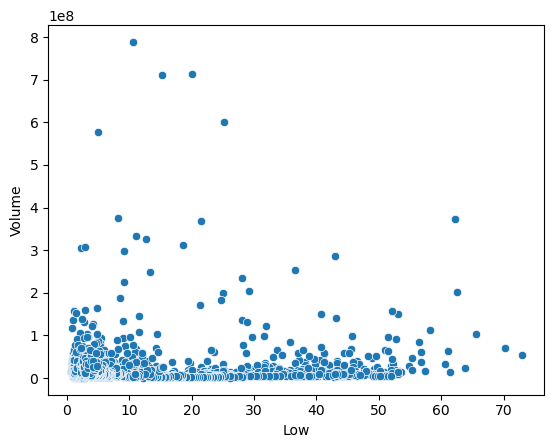

In [32]:
scatter(df, 'Low', 'Volume', 0)

In [33]:
df['Low'].corr(df['Volume'])

0.10259646883179026

The data does not seem to have a relationship. The data is scattered and there is no visible pattern, form, or direction. 